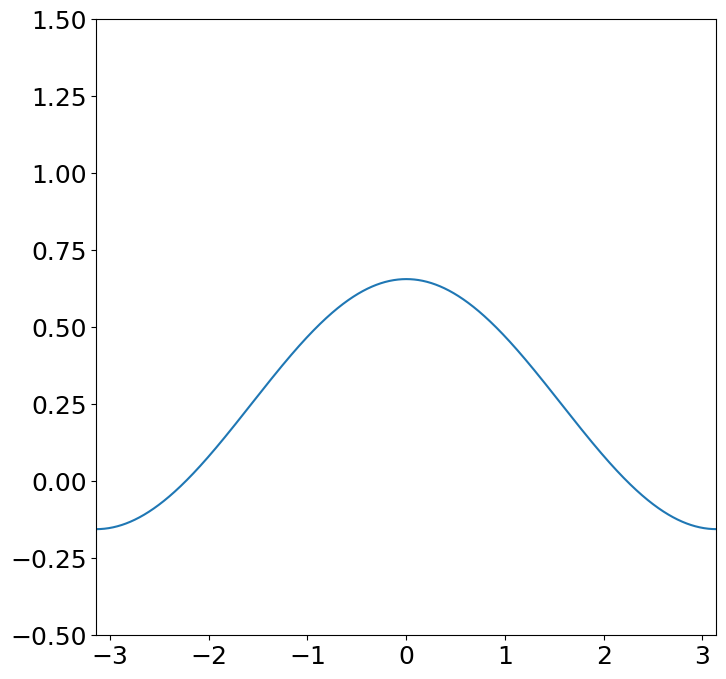

In [12]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

#Set background variables
global fFS
dx = 0.001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))
frames = 20

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size':18})

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n) * np.arange(1, nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n) * np.arange(0, nquart)

# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Set x-axis and y-axis limits
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(f) - 0.5, np.max(f) + 0.5)  # Adjust these values based on your data range


# Compute Fourier series
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = np.full_like(x, A0 / 2)

# Initialize the plot with the first frame of data
img, = ax.plot(x, fFS, '-')  # Unpack the list

def update(i):
    global A, B
    A[i] = np.sum(f * np.cos(np.pi*(i+1) * x/L)) * dx
    B[i] = np.sum(f * np.sin(np.pi*(i+1) * x/L)) * dx
    fFS = A0/2 + np.sum([A[j]*np.cos((j+1)*np.pi*x/L) + B[j]*np.sin((j+1)*np.pi*x/L) for j in range(i+1)], axis=0)
    img.set_data(x, fFS)
    return img,


A = np.zeros(frames)
B = np.zeros(frames)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(frames), interval=dx, blit=True) # You may try blit=True if it works in your environment

plt.show()

# Display the animation in Jupyter notebook
HTML(ani.to_jshtml())